In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [7]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [8]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [9]:
t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

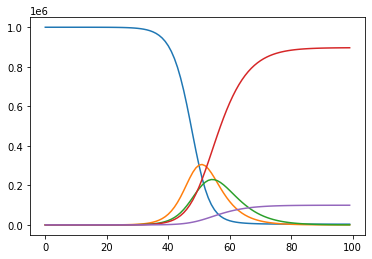

In [14]:
plt.plot(S)
plt.plot(E)
plt.plot(I)
plt.plot(R)
plt.plot(D)

In [27]:


# Italian population
population=60e6;

# Data 20 February - 5 April (46 days):
# Total Cases
total_cases = [3, 20, 79, 132, 219, 322, 400, 650, 888, 1128, 1694, 2036, 2502, 3089, 3858, 4636, 5883, 7375, 9172, 10149, 12462, 15113, 17660, 21157, 24747, 27980, 31506, 35713, 41035, 47021, 53578, 59138, 63927, 69176, 74386, 80539, 86498, 92472, 97689, 101739, 105792, 110574, 115242, 119827, 124632, 128948] # D+R+T+E+H_diagnosticati
# Deaths
deaths = [0, 1, 2, 2, 5, 10, 12, 17, 21, 29, 34, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5476, 6077, 6820, 7503, 8165, 9134, 10023, 10779, 11591, 12428, 13155, 13915, 14681, 15362, 15887] # E
# Recovered
recovered = [0, 0, 0, 1, 1, 1, 3, 45, 46, 50, 83, 149, 160, 276, 414, 523, 589, 622, 724, 1004, 1045, 1258, 1439, 1966, 2335, 2749, 2941, 4025, 4440, 5129, 6072, 7024, 7432, 8326, 9362, 10361, 10950, 12384, 13030, 14620, 15729, 16847, 18278, 19758, 20996, 21815] # H_diagnosticati
# Currently Positive
positive = [3, 19, 77, 129, 213, 311, 385, 588, 821, 1049, 1577, 1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 37860, 42681, 46638, 50418, 54030, 57521, 62013, 66414, 70065, 73880, 75528, 77635, 80572, 83049, 85388, 88274, 91246] # D+R+T

# Data 23 February - 5 April (from day 4 to day 46)
# Currently positive: isolated at home
isolated_at_home = [49, 91, 162, 221, 284, 412, 543, 798, 927, 1000, 1065, 1155, 1060, 1843, 2180, 2936, 2599, 3724, 5036, 6201, 7860, 9268, 10197, 11108, 12090, 14935, 19185, 22116, 23783, 26522, 28697, 30920, 33648, 36653, 39533, 42588, 43752, 45420, 48134, 50456, 52579, 55270, 58320] #D
# Currently positive: hospitalised
hospitalized = [54, 99, 114, 128, 248, 345, 401, 639, 742, 1034, 1346, 1790, 2394, 2651, 3557, 4316, 5038, 5838, 6650, 7426, 8372, 9663, 11025, 12894, 14363, 15757, 16020, 17708, 19846, 20692, 21937, 23112, 24753, 26029, 26676, 27386, 27795, 28192, 28403, 28540, 28741, 29010, 28949] # R
# Currently positive: ICU
icu = [26, 23, 35, 36, 56, 64, 105, 140, 166, 229, 295, 351, 462, 567, 650, 733, 877, 1028, 1153, 1328, 1518, 1672, 1851, 2060, 2257, 2498, 2655, 2857, 3009, 3204, 3396, 3489, 3612, 3732, 3856, 3906, 3981, 4023, 4035, 4053, 4068, 3994, 3977]#T

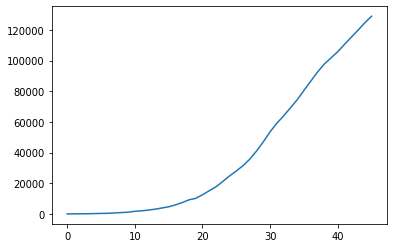

In [28]:
plt.plot(total_cases)

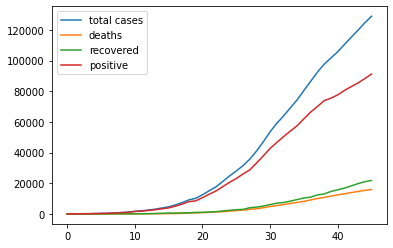

In [29]:
plt.plot(total_cases, label='total cases')
plt.plot(deaths, label='deaths')
plt.plot(recovered, label='recovered')
plt.plot(positive, label='positive')
plt.legend()

### Generate training data

In [30]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

In [31]:
N = 1_000_000
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.2  # 20% death rate
rho = 1/9  # 9 days from infection until death
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

In [32]:
t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

### assume we're gonna be testing on italian data

In [34]:
np.arange(1,10,1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
from tqdm import tqdm
N=60e6
D_vals = np.arange(4,10,1)
#gamma = 1/D
delta_vals = 1/np.arange(5,15,1)
R_0_vals = np.arange(2,5,0.25)
#beta = R_0  *gamma
alpha_vals = np.arange(0.02, 0.2, 0.02)
rho_vals = np.arange(9,20,1)
S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

X_train = []
y_train = []

for D in tqdm(D_vals):
    for delta in delta_vals:
        for R_0 in R_0_vals:
            for alpha in alpha_vals:
                for rho in rho_vals:
                    gamma = 1.0/D
                    beta = R_0 * gamma
                    t = np.linspace(0, 46, 46) # Grid of time points (in days)
                    y0 = S0, E0, I0, R0, D0 # Initial conditions vector

                    # Integrate the SIR equations over the time grid, t.
                    ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
                    #S, E, I, R, D = ret.T
                    X_train.append(ret.T)
                    y_train.append([beta, gamma, delta, alpha, rho])

100%|██████████| 6/6 [01:38<00:00, 16.40s/it]


In [71]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [72]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

In [73]:
X_train.shape

(71280, 5, 46)

In [74]:
X_train = X_train.reshape(71280, 5*46)

In [75]:
y_train.shape

(71280, 5)

In [76]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Prepare SEIRD test data

In [88]:
X_train[1000][46:92]

array([ 1.        ,  0.90002466,  0.92109139,  0.99573937,  1.09875705,
        1.22131655,  1.36101084,  1.5180243 ,  1.6936694 ,  1.88983749,
        2.10880364,  2.35317001,  2.6258648 ,  2.93016498,  3.26973089,
        3.64864842,  4.07147762,  4.54330712,  5.06981534,  5.65733874,
        6.31294819,  7.0445339 ,  7.86090046,  8.77187273,  9.78841433,
       10.92275927, 12.18855932, 13.6010482 , 15.17722522, 16.93605946,
       18.89871831, 21.08882213, 23.53272855, 26.25984975, 29.303006  ,
       32.69882116, 36.48816316, 40.71663592, 45.43512712, 50.7004232 ,
       56.57589031, 63.13223717, 70.44836659, 78.61232507, 87.72236105,
       97.88810884])

In [95]:
R = np.array([0, 0, 0, 1, 1, 1, 3, 45, 46, 50, 83, 149, 160, 276, 414, 523, 589, 622, 724, 1004, 1045, 1258, 1439, 1966, 2335, 2749, 2941, 4025, 4440, 5129, 6072, 7024, 7432, 8326, 9362, 10361, 10950, 12384, 13030, 14620, 15729, 16847, 18278, 19758, 20996, 21815]) # H_diagnosticati
D = np.array([0, 1, 2, 2, 5, 10, 12, 17, 21, 29, 34, 52, 79, 107, 148, 197, 233, 366, 463, 631, 827, 1016, 1266, 1441, 1809, 2158, 2503, 2978, 3405, 4032, 4825, 5476, 6077, 6820, 7503, 8165, 9134, 10023, 10779, 11591, 12428, 13155, 13915, 14681, 15362, 15887]) # E
I = np.array([3, 19, 77, 129, 213, 311, 385, 588, 821, 1049, 1577, 1835, 2263, 2706, 3296, 3916, 5061, 6387, 7985, 8514, 10590, 12839, 14955, 17750, 20603, 23073, 26062, 28710, 33190, 37860, 42681, 46638, 50418, 54030, 57521, 62013, 66414, 70065, 73880, 75528, 77635, 80572, 83049, 85388, 88274, 91246]) # D+R+T
E = np.array([2,15, 27, 49, 91, 162, 221, 284, 412, 543, 798, 927, 1000, 1065, 1155, 1060, 1843, 2180, 2936, 2599, 3724, 5036, 6201, 7860, 9268, 10197, 11108, 12090, 14935, 19185, 22116, 23783, 26522, 28697, 30920, 33648, 36653, 39533, 42588, 43752, 45420, 48134, 50456, 52579, 55270, 58320]) #D
S = 60e6 - E

In [98]:
X_test = np.array([S,E,I,R,D])

In [106]:
X_test = X_test.reshape(1, 5*46)

In [109]:
beta, gamma, delta, alpha, rho = regr.predict(X_test)[0]

In [110]:
t = np.linspace(0, 46, 46) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))

In [112]:
S_pred,E_pred,I_pred,R_pred,D_pred = ret.T

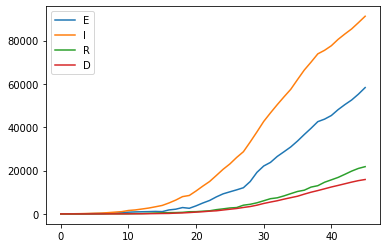

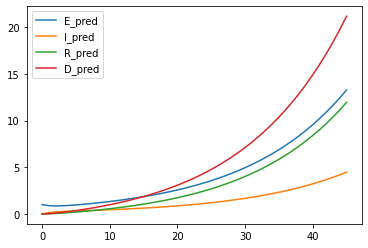

In [118]:
#plt.plot(S)
plt.plot(E, label='E')
plt.plot(I, label='I')
plt.plot(R, label='R')
plt.plot(D, label='D')
plt.legend()
plt.show()

plt.plot(E_pred, label='E_pred')
plt.plot(I_pred, label='I_pred')
plt.plot(R_pred, label='R_pred')
plt.plot(D_pred, label='D_pred')
plt.legend()
plt.show()